# importacion de datos

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('cumulative.csv')
df

,disposicion_literatura,disposicion_kepler,confianza_disposicion,columna_fpflag_nt,columna_fpflag_ss,columna_fpflag_co,columna_fpflag_ec,periodo_orbital,columna_period_err1,columna_period_err2,...,columna_steff_err2,gravedad_superficial,columna_slogg_err1,columna_slogg_err2,radio_estrella,columna_srad_err1,columna_srad_err2,ascension_recta,declinacion,magnitud_kepler
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,0.000071,0.000162,0.999838,...,0.954030,0.831296,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,0.000417,0.001438,0.998562,...,0.954030,0.831296,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,15.347
2,'FALSE POSITIVE','FALSE POSITIVE',0.000,0,1,0,0,0.000151,0.000087,0.999913,...,0.900114,0.845778,0.029891,0.854184,0.003303,0.007041,0.999328,0.784346,0.733360,15.436
3,'FALSE POSITIVE','FALSE POSITIVE',0.000,0,1,0,0,0.000012,0.000000,1.000000,...,0.901249,0.849539,0.036005,0.860812,0.002968,0.006074,0.999423,0.259826,0.742947,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,0.000018,0.000023,0.999977,...,0.880250,0.825842,0.047554,0.826015,0.004077,0.010093,0.998855,0.407085,0.739203,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,'FALSE POSITIVE','FALSE POSITIVE',0.000,0,0,0,1,0.000064,0.001072,0.998928,...,0.913734,0.799135,0.156929,0.843413,0.004260,0.009459,0.998037,0.864114,0.659700,14.478
9560,'FALSE POSITIVE','FALSE POSITIVE',0.000,0,1,1,0,0.000002,0.000000,1.000000,...,0.905789,0.842957,0.023777,0.837614,0.003455,0.007162,0.999320,0.792756,0.667345,14.082
9561,CANDIDATE,CANDIDATE,0.497,0,0,0,0,0.000012,0.000104,0.999896,...,0.875142,0.826970,0.038043,0.814416,0.004012,0.010305,0.999018,0.304401,0.671749,14.757
9562,'FALSE POSITIVE','FALSE POSITIVE',0.021,0,0,1,0,0.000003,0.000012,0.999988,...,0.866061,0.827534,0.038043,0.814416,0.004056,0.010305,0.999018,0.654479,0.672578,15.385


# Preprocesamientos de los datos

El preprocesamiento se realizó en Weka (versión 3.8) para garantizar la calidad de los
datos. Los pasos incluyeron:
1. Se eliminaron las columnas **columna_rowid**, **columna_kepid**, **nombre_kepoi**, **nombre_kepler**, que son identificadores sin valor predictivo.
2. Se Los valores ’?’ en atributos numéricos fueron reemplazados por la media de cada columna utilizando el filtro ReplaceMissingValues
3. Los atributos numéricos se escalaron al rango [0, 1] con el filtro Normalize para garantizar una contribución equitativa en PCA y el modelado

## Verificamos que ningun valor falte

In [5]:
missing_values = df.isnull().sum()
print(missing_values)
print("Total de valores faltantes:", missing_values.sum())  # Suma total


disposicion_literatura    0
disposicion_kepler        0
confianza_disposicion     0
columna_fpflag_nt         0
columna_fpflag_ss         0
columna_fpflag_co         0
columna_fpflag_ec         0
periodo_orbital           0
columna_period_err1       0
columna_period_err2       0
columna_time0bk           0
columna_time0bk_err1      0
columna_time0bk_err2      0
columna_impact            0
columna_impact_err1       0
columna_impact_err2       0
duracion_transito         0
columna_duration_err1     0
columna_duration_err2     0
profundidad_transito      0
columna_depth_err1        0
columna_depth_err2        0
radio_planeta             0
columna_prad_err1         0
columna_prad_err2         0
columna_teq               0
columna_insol             0
columna_insol_err1        0
columna_insol_err2        0
columna_model_snr         0
columna_tce_plnt_num      0
temperatura_estrella      0
columna_steff_err1        0
columna_steff_err2        0
gravedad_superficial      0
columna_slogg_err1  

In [6]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('cumulative_preprocesado.csv')
scaler = MinMaxScaler()
df['magnitud_kepler'] = scaler.fit_transform(df[['magnitud_kepler']])  # normalizacion de la columna "magnitud_kepler"
df

,disposicion_literatura,disposicion_kepler,confianza_disposicion,columna_fpflag_nt,columna_fpflag_ss,columna_fpflag_co,columna_fpflag_ec,periodo_orbital,columna_period_err1,columna_period_err2,...,columna_steff_err2,gravedad_superficial,columna_slogg_err1,columna_slogg_err2,radio_estrella,columna_srad_err1,columna_srad_err2,ascension_recta,declinacion,magnitud_kepler
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,0.000071,0.000162,0.999838,...,0.954030,0.831296,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,0.642863
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,0.000417,0.001438,0.998562,...,0.954030,0.831296,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,0.642863
2,'FALSE POSITIVE','FALSE POSITIVE',0.000,0,1,0,0,0.000151,0.000087,0.999913,...,0.900114,0.845778,0.029891,0.854184,0.003303,0.007041,0.999328,0.784346,0.733360,0.649689
3,'FALSE POSITIVE','FALSE POSITIVE',0.000,0,1,0,0,0.000012,0.000000,1.000000,...,0.901249,0.849539,0.036005,0.860812,0.002968,0.006074,0.999423,0.259826,0.742947,0.662039
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,0.000018,0.000023,0.999977,...,0.880250,0.825842,0.047554,0.826015,0.004077,0.010093,0.998855,0.407085,0.739203,0.655289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,'FALSE POSITIVE','FALSE POSITIVE',0.000,0,0,0,1,0.000064,0.001072,0.998928,...,0.913734,0.799135,0.156929,0.843413,0.004260,0.009459,0.998037,0.864114,0.659700,0.576206
9560,'FALSE POSITIVE','FALSE POSITIVE',0.000,0,1,1,0,0.000002,0.000000,1.000000,...,0.905789,0.842957,0.023777,0.837614,0.003455,0.007162,0.999320,0.792756,0.667345,0.545831
9561,CANDIDATE,CANDIDATE,0.497,0,0,0,0,0.000012,0.000104,0.999896,...,0.875142,0.826970,0.038043,0.814416,0.004012,0.010305,0.999018,0.304401,0.671749,0.597607
9562,'FALSE POSITIVE','FALSE POSITIVE',0.021,0,0,1,0,0.000003,0.000012,0.999988,...,0.866061,0.827534,0.038043,0.814416,0.004056,0.010305,0.999018,0.654479,0.672578,0.645777


## Aplicando One Hot Encoder para datos nominales

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Supongamos que 'df' es tu DataFrame original
# Aplica OneHotEncoder solo a disposicion_kepler (o las categóricas que no son objetivo)
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(df[['disposicion_kepler']])  # Solo disposicion_kepler
df_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
df = pd.concat([df.drop(['disposicion_kepler'], axis=1), df_encoded], axis=1)
df

,disposicion_literatura,confianza_disposicion,columna_fpflag_nt,columna_fpflag_ss,columna_fpflag_co,columna_fpflag_ec,periodo_orbital,columna_period_err1,columna_period_err2,columna_time0bk,...,columna_slogg_err1,columna_slogg_err2,radio_estrella,columna_srad_err1,columna_srad_err2,ascension_recta,declinacion,magnitud_kepler,disposicion_kepler_'FALSE POSITIVE',disposicion_kepler_CANDIDATE
0,CONFIRMED,1.000,0,0,0,0,0.000071,0.000162,0.999838,0.036999,...,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,0.642863,0.0,1.0
1,CONFIRMED,0.969,0,0,0,0,0.000417,0.001438,0.998562,0.031063,...,0.043478,0.920464,0.003560,0.003173,0.999475,0.552473,0.733837,0.642863,0.0,1.0
2,'FALSE POSITIVE',0.000,0,1,0,0,0.000151,0.000087,0.999913,0.040928,...,0.029891,0.854184,0.003303,0.007041,0.999328,0.784346,0.733360,0.649689,1.0,0.0
3,'FALSE POSITIVE',0.000,0,1,0,0,0.000012,0.000000,1.000000,0.036828,...,0.036005,0.860812,0.002968,0.006074,0.999423,0.259826,0.742947,0.662039,1.0,0.0
4,CONFIRMED,1.000,0,0,0,0,0.000018,0.000023,0.999977,0.037781,...,0.047554,0.826015,0.004077,0.010093,0.998855,0.407085,0.739203,0.655289,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,'FALSE POSITIVE',0.000,0,0,0,1,0.000064,0.001072,0.998928,0.008506,...,0.156929,0.843413,0.004260,0.009459,0.998037,0.864114,0.659700,0.576206,1.0,0.0
9560,'FALSE POSITIVE',0.000,0,1,1,0,0.000002,0.000000,1.000000,0.008276,...,0.023777,0.837614,0.003455,0.007162,0.999320,0.792756,0.667345,0.545831,1.0,0.0
9561,CANDIDATE,0.497,0,0,0,0,0.000012,0.000104,0.999896,0.009235,...,0.038043,0.814416,0.004012,0.010305,0.999018,0.304401,0.671749,0.597607,0.0,1.0
9562,'FALSE POSITIVE',0.021,0,0,1,0,0.000003,0.000012,0.999988,0.008629,...,0.038043,0.814416,0.004056,0.010305,0.999018,0.654479,0.672578,0.645777,1.0,0.0


## Aplicando MDA

In [8]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Asume que 'df' es tu DataFrame preprocesado
# Columnas numéricas normalizadas
numeric_cols = [
    'ascension_recta', 'columna_depth_err1', 'columna_depth_err2', 'columna_duration_err1',
    'columna_duration_err2', 'columna_fpflag_co', 'columna_fpflag_ec', 'columna_fpflag_nt',
    'columna_fpflag_ss', 'columna_impact', 'columna_impact_err1', 'columna_impact_err2',
    'columna_insol', 'columna_insol_err1', 'columna_insol_err2', 'columna_model_snr',
    'columna_period_err1', 'columna_period_err2', 'columna_prad_err1', 'columna_prad_err2',
    'columna_slogg_err1', 'columna_slogg_err2', 'columna_srad_err1', 'columna_srad_err2',
    'columna_steff_err1', 'columna_steff_err2', 'columna_tce_plnt_num', 'columna_teq',
    'columna_time0bk', 'columna_time0bk_err1', 'columna_time0bk_err2', 'confianza_disposicion',
    'declinacion', 'duracion_transito', 'gravedad_superficial', 'magnitud_kepler',
    'periodo_orbital', 'profundidad_transito', 'radio_estrella', 'radio_planeta',
    'temperatura_estrella'
]

# Columnas one-hot de disposicion_kepler
one_hot_cols = [
    'disposicion_kepler_\'FALSE POSITIVE\'', 'disposicion_kepler_CANDIDATE'
]

# Características (numéricas + one-hot de disposicion_kepler)
X = df[numeric_cols + one_hot_cols]
y = df['disposicion_literatura']  # Variable objetivo (categórica)

# Codifica y
le = LabelEncoder()
y = le.fit_transform(y)  # Convierte CONFIRMED, CANDIDATE, FALSE POSITIVE a 0, 1, 2

# Divide en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Máximo 2 componentes (3 clases - 1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Verifica varianza explicada
print(lda.explained_variance_ratio_)

# Crea DataFrames con componentes LDA
df_train_lda = pd.DataFrame(X_train_lda, columns=['LDA1', 'LDA2'])
df_test_lda = pd.DataFrame(X_test_lda, columns=['LDA1', 'LDA2'])

# Alinea índices
df_train_lda.index = X_train.index
df_test_lda.index = X_test.index

# Concatena con columnas one-hot de disposicion_kepler
X_train_final = pd.concat([df_train_lda, df[one_hot_cols].loc[X_train.index]], axis=1)
X_test_final = pd.concat([df_test_lda, df[one_hot_cols].loc[X_test.index]], axis=1)



[0.99656468 0.00343532]


## Graficos con Matplotlib

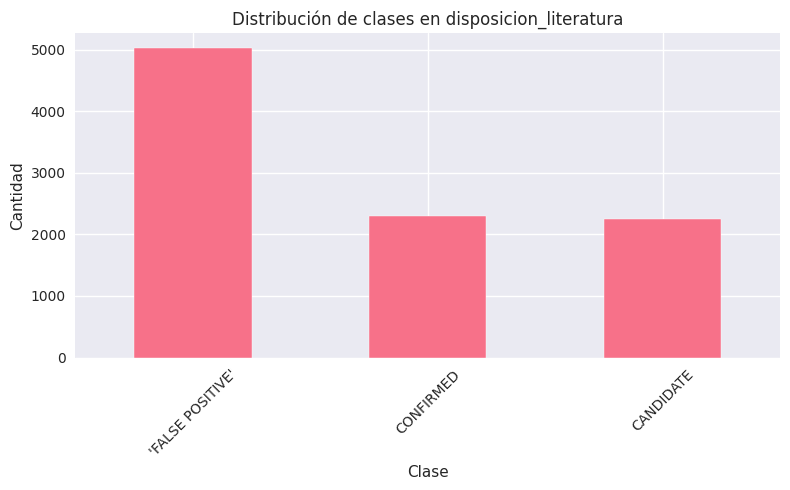

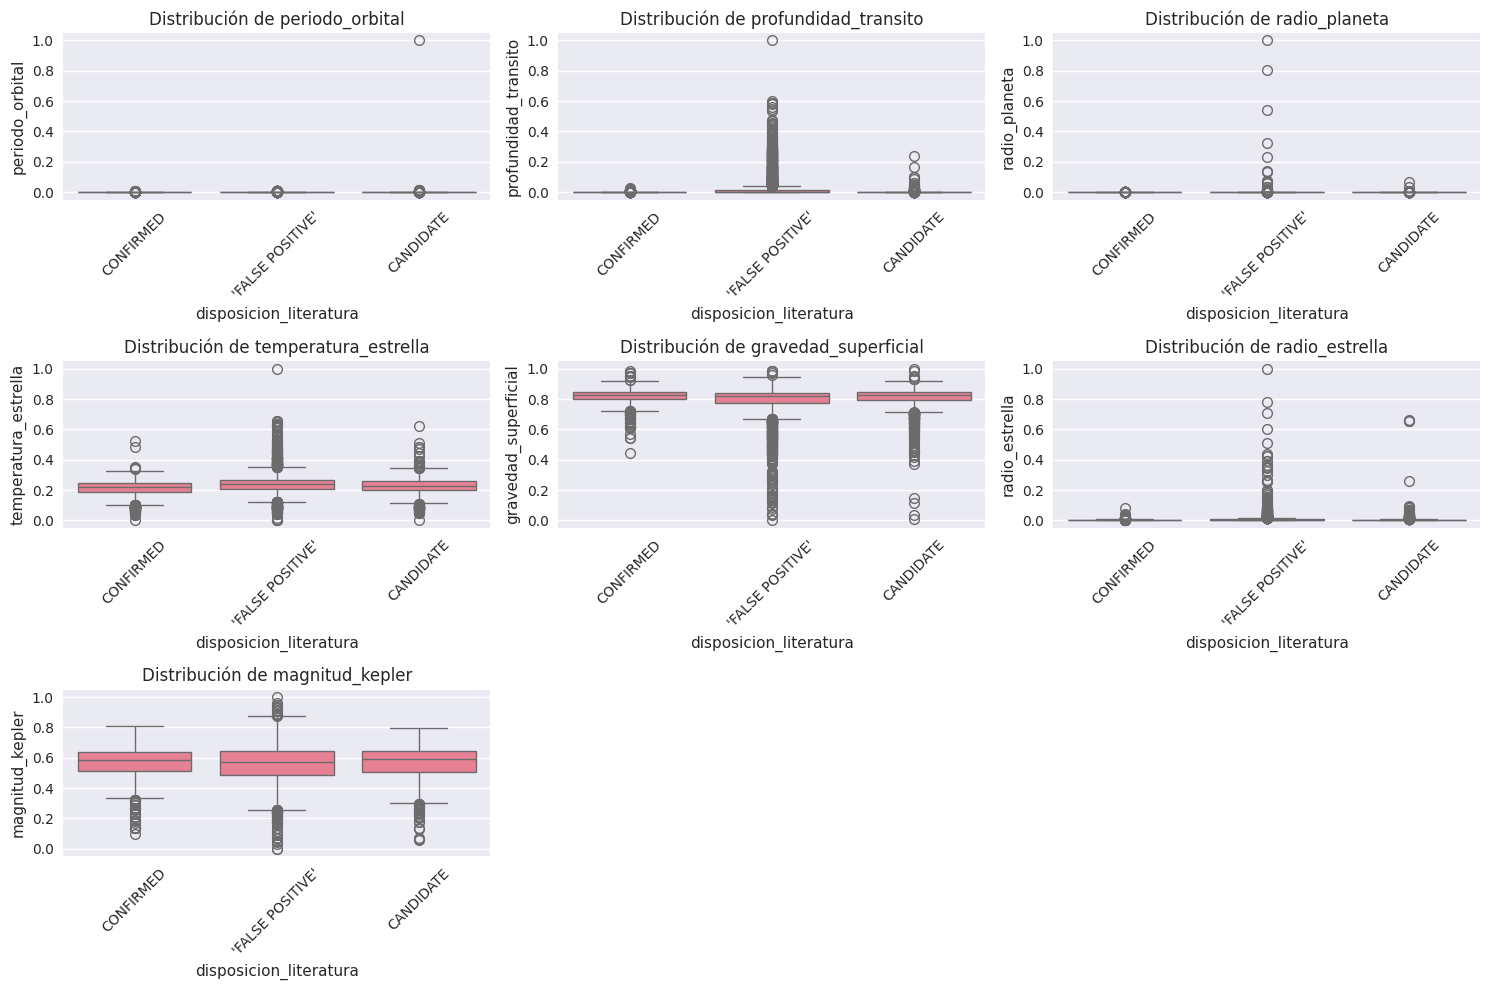

/tmp/ipykernel_20200/3666397474.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/reed/entorno-global/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


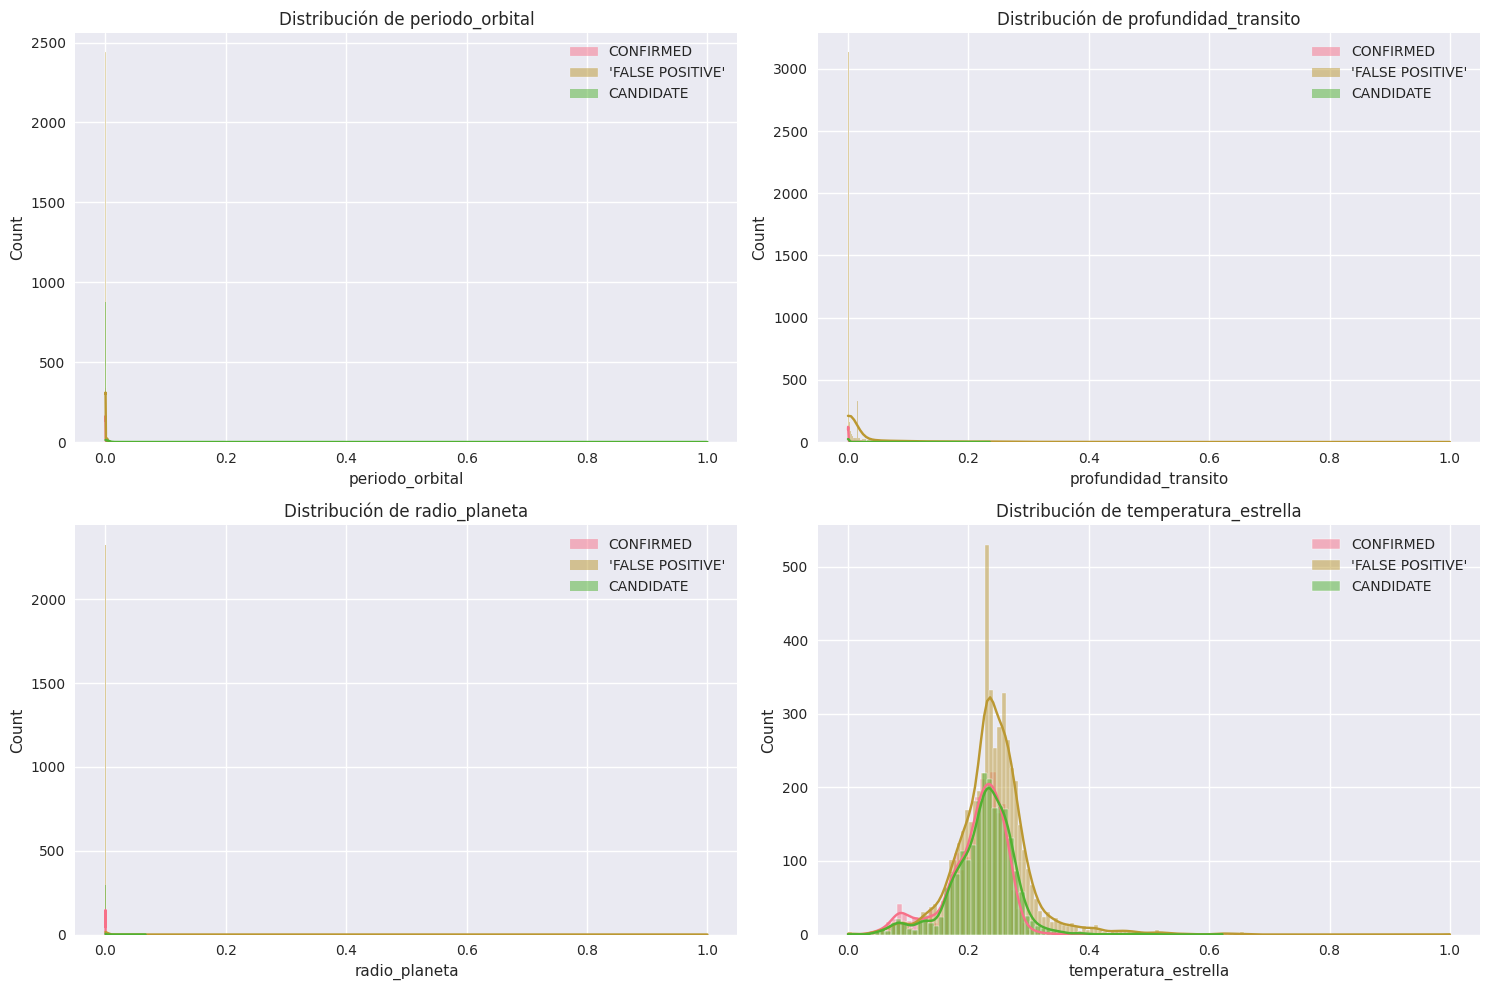

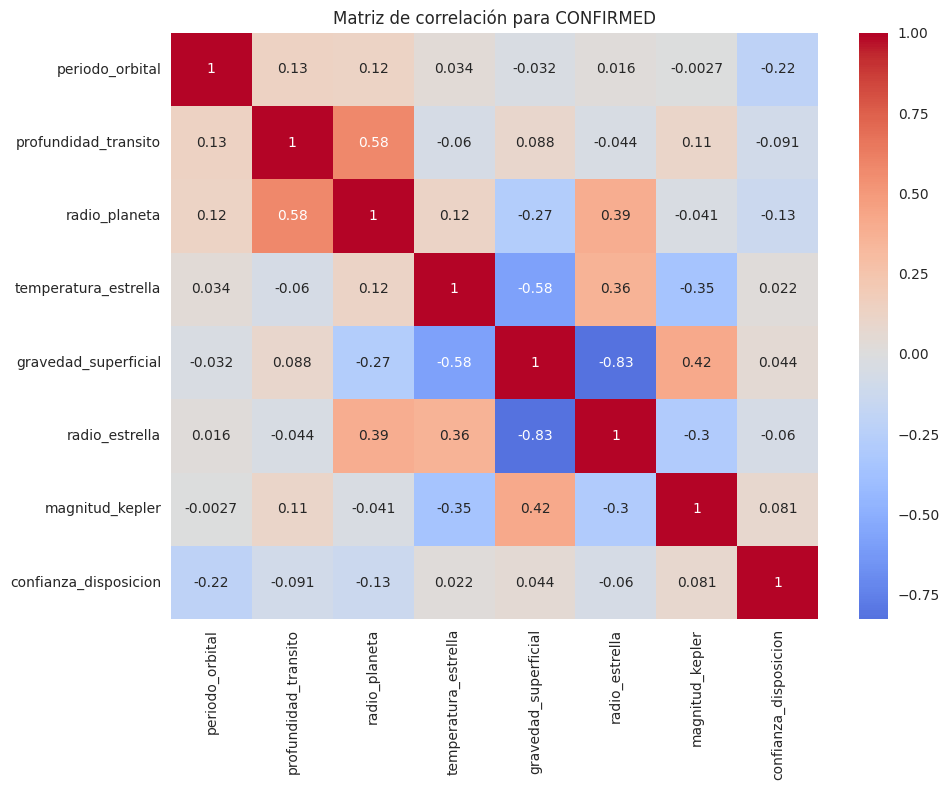

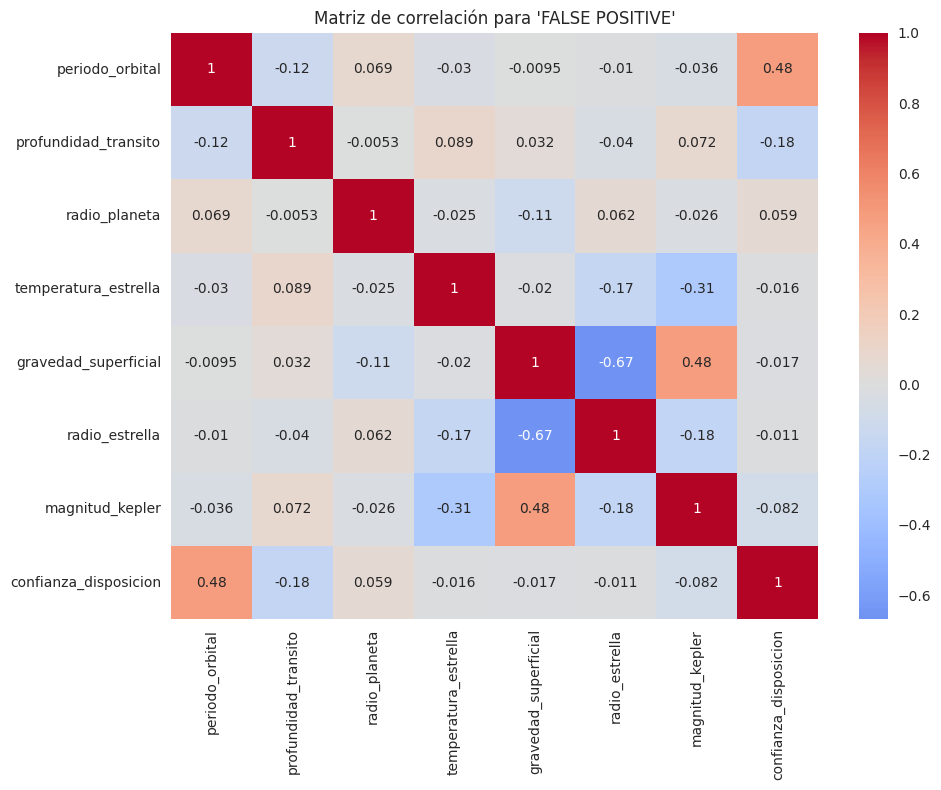

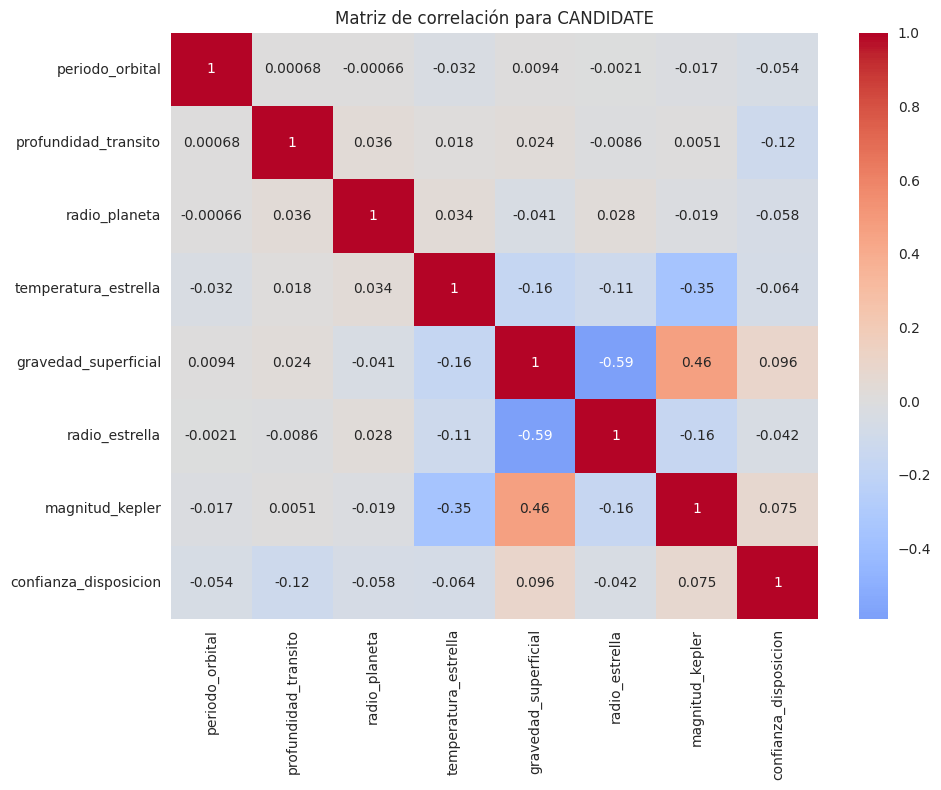

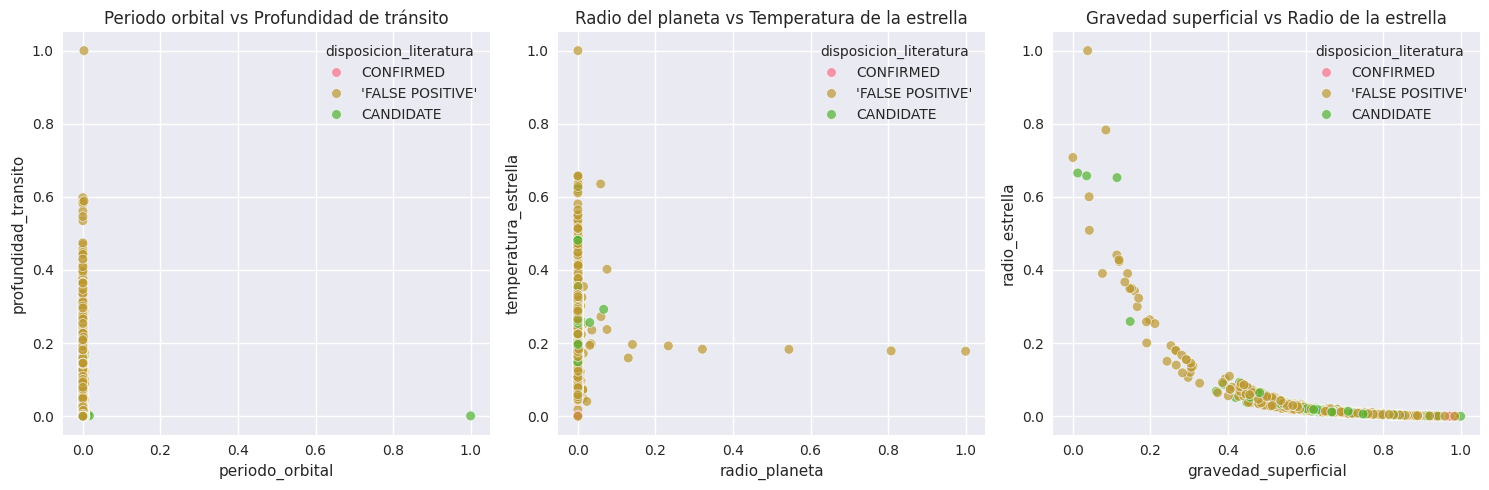

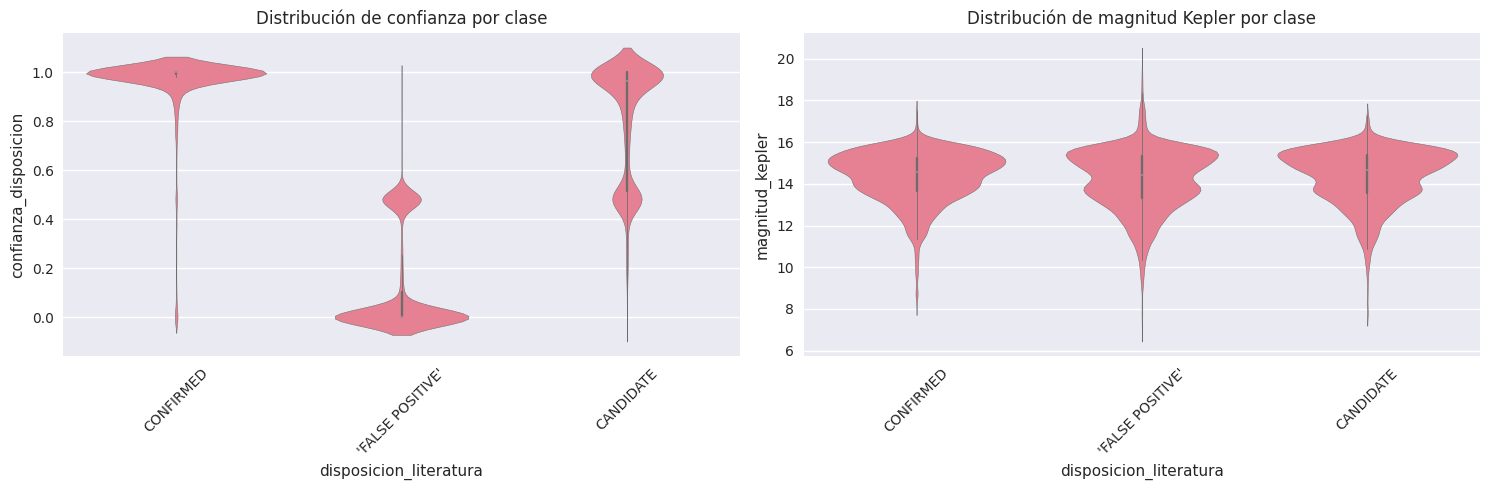

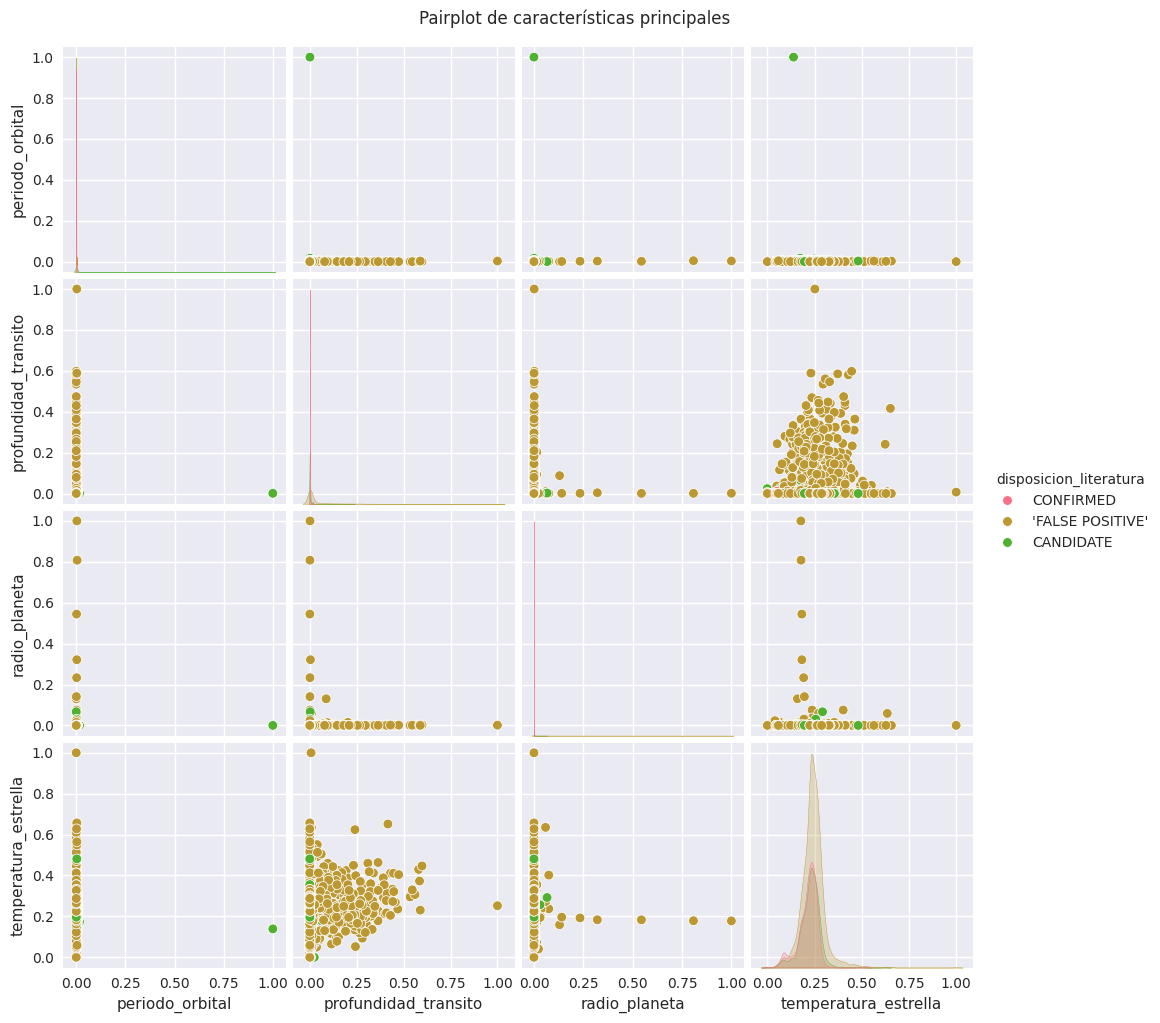

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos
dt = pd.read_csv('cumulative_preprocesado.csv')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Distribución de las clases
plt.figure(figsize=(8, 5))
dt['disposicion_literatura'].value_counts().plot(kind='bar')
plt.title('Distribución de clases en disposicion_literatura')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Boxplots de características numéricas por clase
numeric_cols = ['periodo_orbital', 'profundidad_transito', 'radio_planeta',
                'temperatura_estrella', 'gravedad_superficial', 'radio_estrella',
                'magnitud_kepler']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='disposicion_literatura', y=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Histogramas de características seleccionadas por clase
features_to_plot = ['periodo_orbital', 'profundidad_transito', 'radio_planeta', 'temperatura_estrella']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    for category in dt['disposicion_literatura'].unique():
        sns.histplot(df[df['disposicion_literatura'] == category][feature],
                     label=category, alpha=0.5, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

# 4. Matriz de correlación para cada clase
corr_cols = ['periodo_orbital', 'profundidad_transito', 'radio_planeta',
             'temperatura_estrella', 'gravedad_superficial', 'radio_estrella',
             'magnitud_kepler', 'confianza_disposicion']

for category in df['disposicion_literatura'].unique():
    plt.figure(figsize=(10, 8))
    corr_matrix = dt[dt['disposicion_literatura'] == category][corr_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Matriz de correlación para {category}')
    plt.tight_layout()
    plt.show()

# 5. Scatter plots de relaciones clave
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='periodo_orbital', y='profundidad_transito',
                hue='disposicion_literatura', data=dt, alpha=0.7)
plt.title('Periodo orbital vs Profundidad de tránsito')

plt.subplot(1, 3, 2)
sns.scatterplot(x='radio_planeta', y='temperatura_estrella',
                hue='disposicion_literatura', data=dt, alpha=0.7)
plt.title('Radio del planeta vs Temperatura de la estrella')

plt.subplot(1, 3, 3)
sns.scatterplot(x='gravedad_superficial', y='radio_estrella',
                hue='disposicion_literatura', data=dt, alpha=0.7)
plt.title('Gravedad superficial vs Radio de la estrella')

plt.tight_layout()
plt.show()

# 6. Violin plots para comparar distribuciones
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.violinplot(x='disposicion_literatura', y='confianza_disposicion', data=dt)
plt.title('Distribución de confianza por clase')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.violinplot(x='disposicion_literatura', y='magnitud_kepler', data=dt)
plt.title('Distribución de magnitud Kepler por clase')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 7. Pairplot de características seleccionadas
sns.pairplot(dt[['disposicion_literatura', 'periodo_orbital', 'profundidad_transito',
                 'radio_planeta', 'temperatura_estrella']],
             hue='disposicion_literatura', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot de características principales', y=1.02)
plt.show()

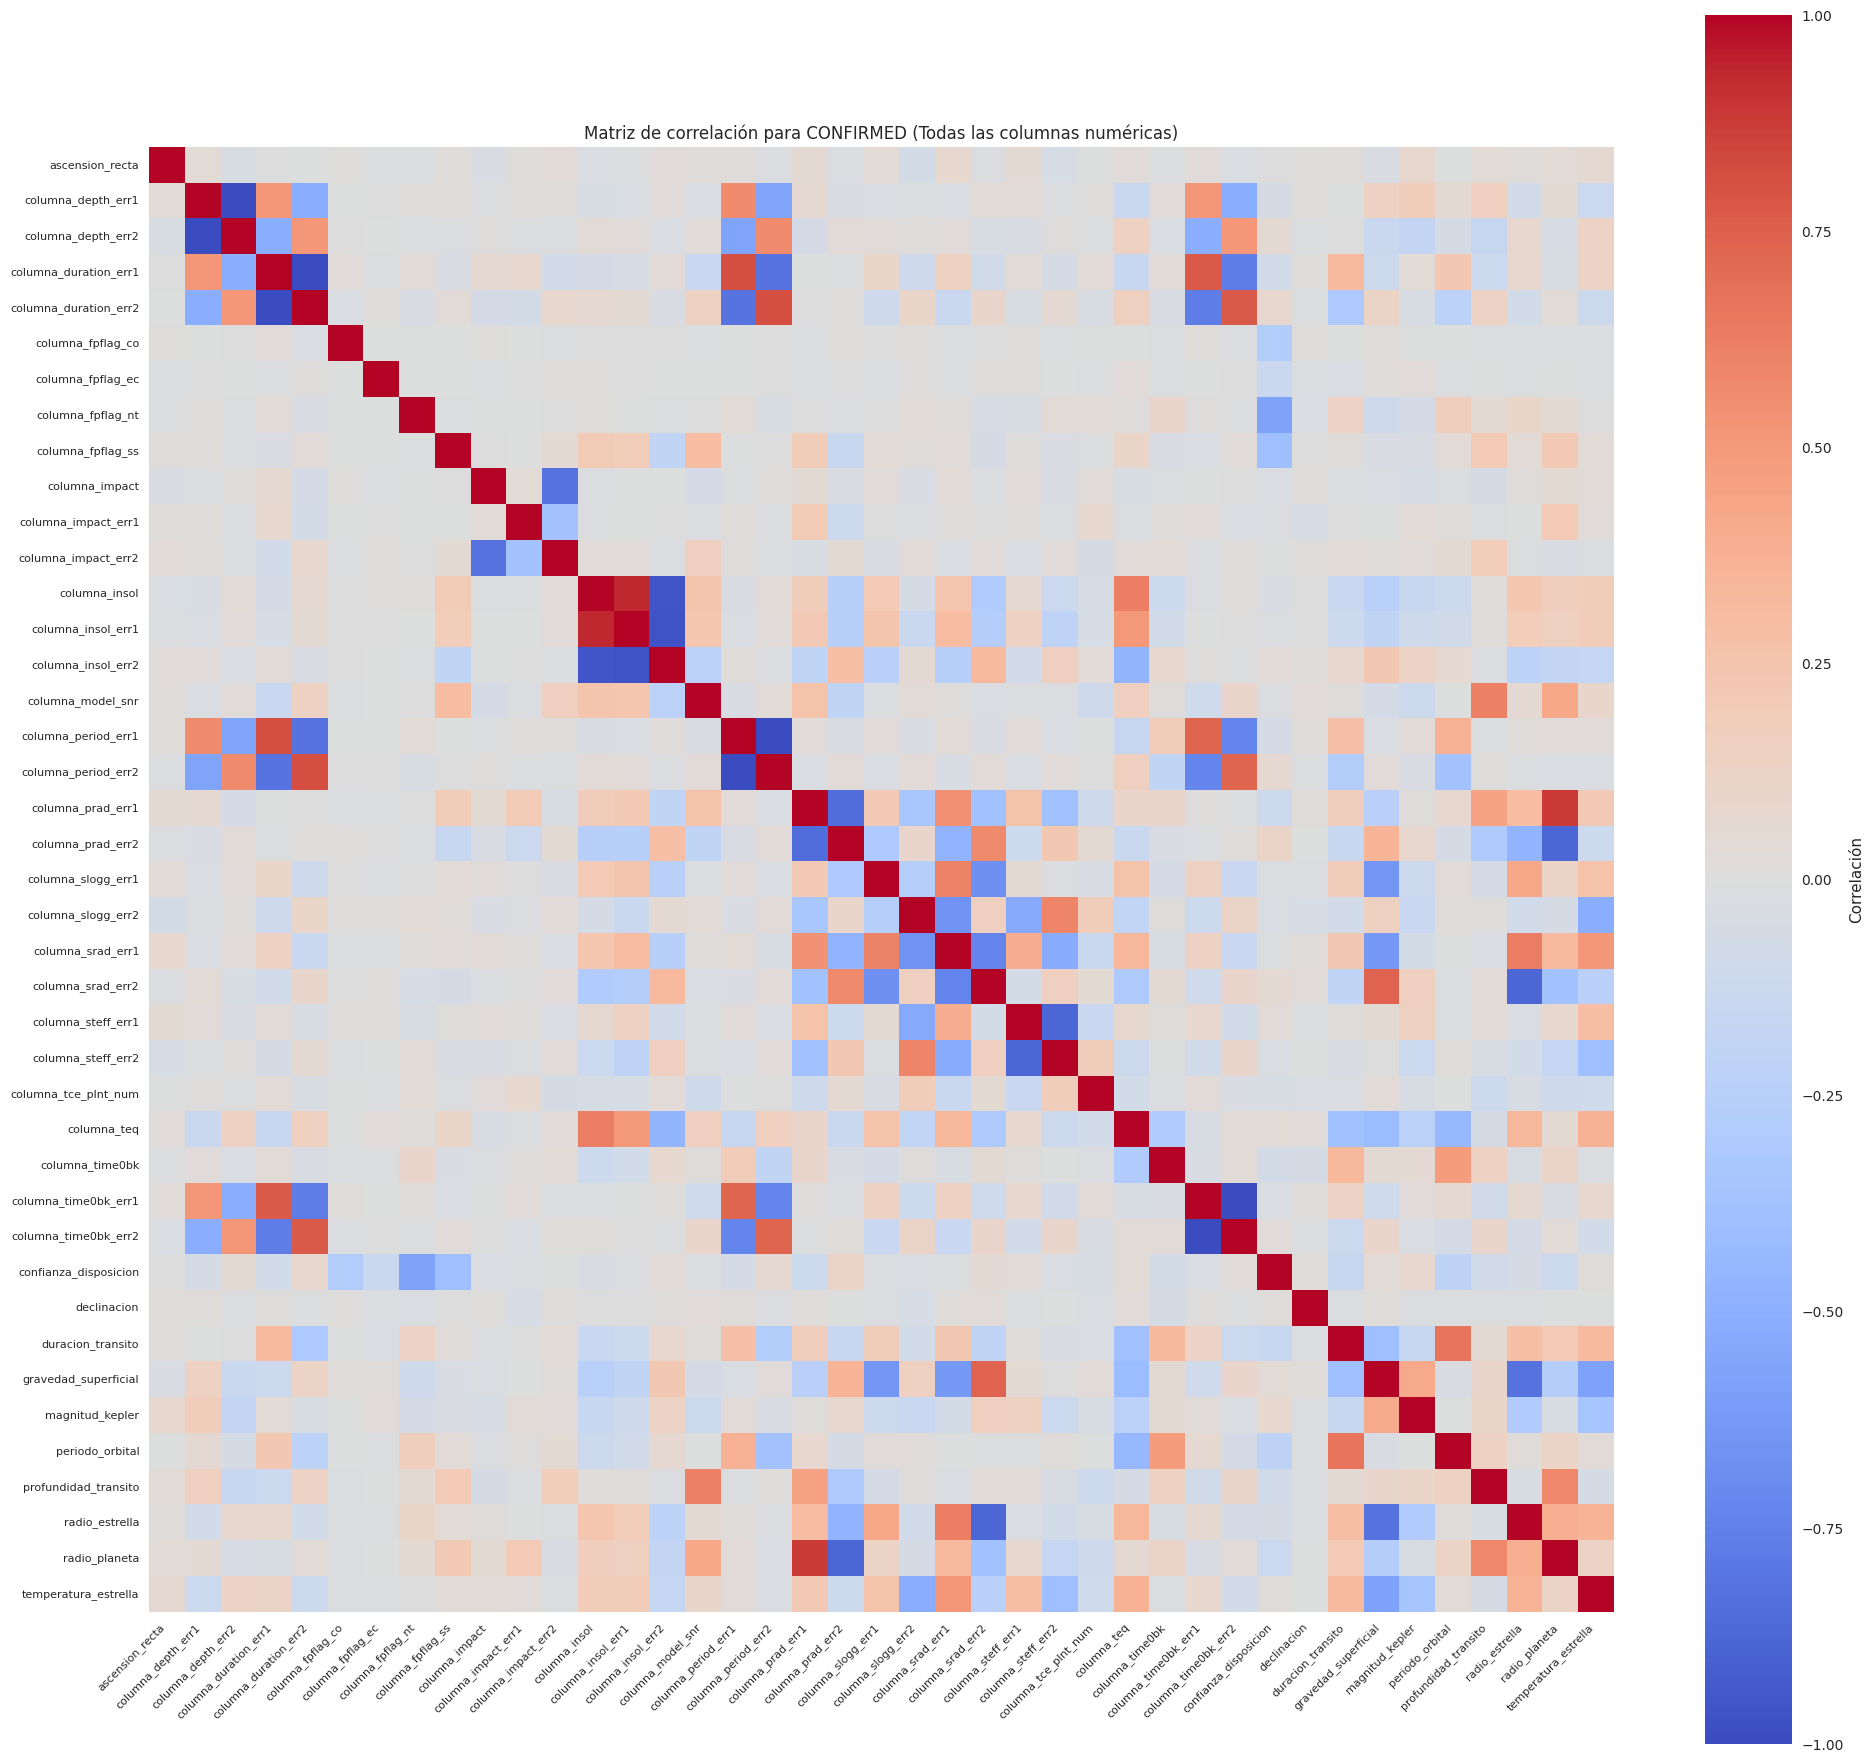

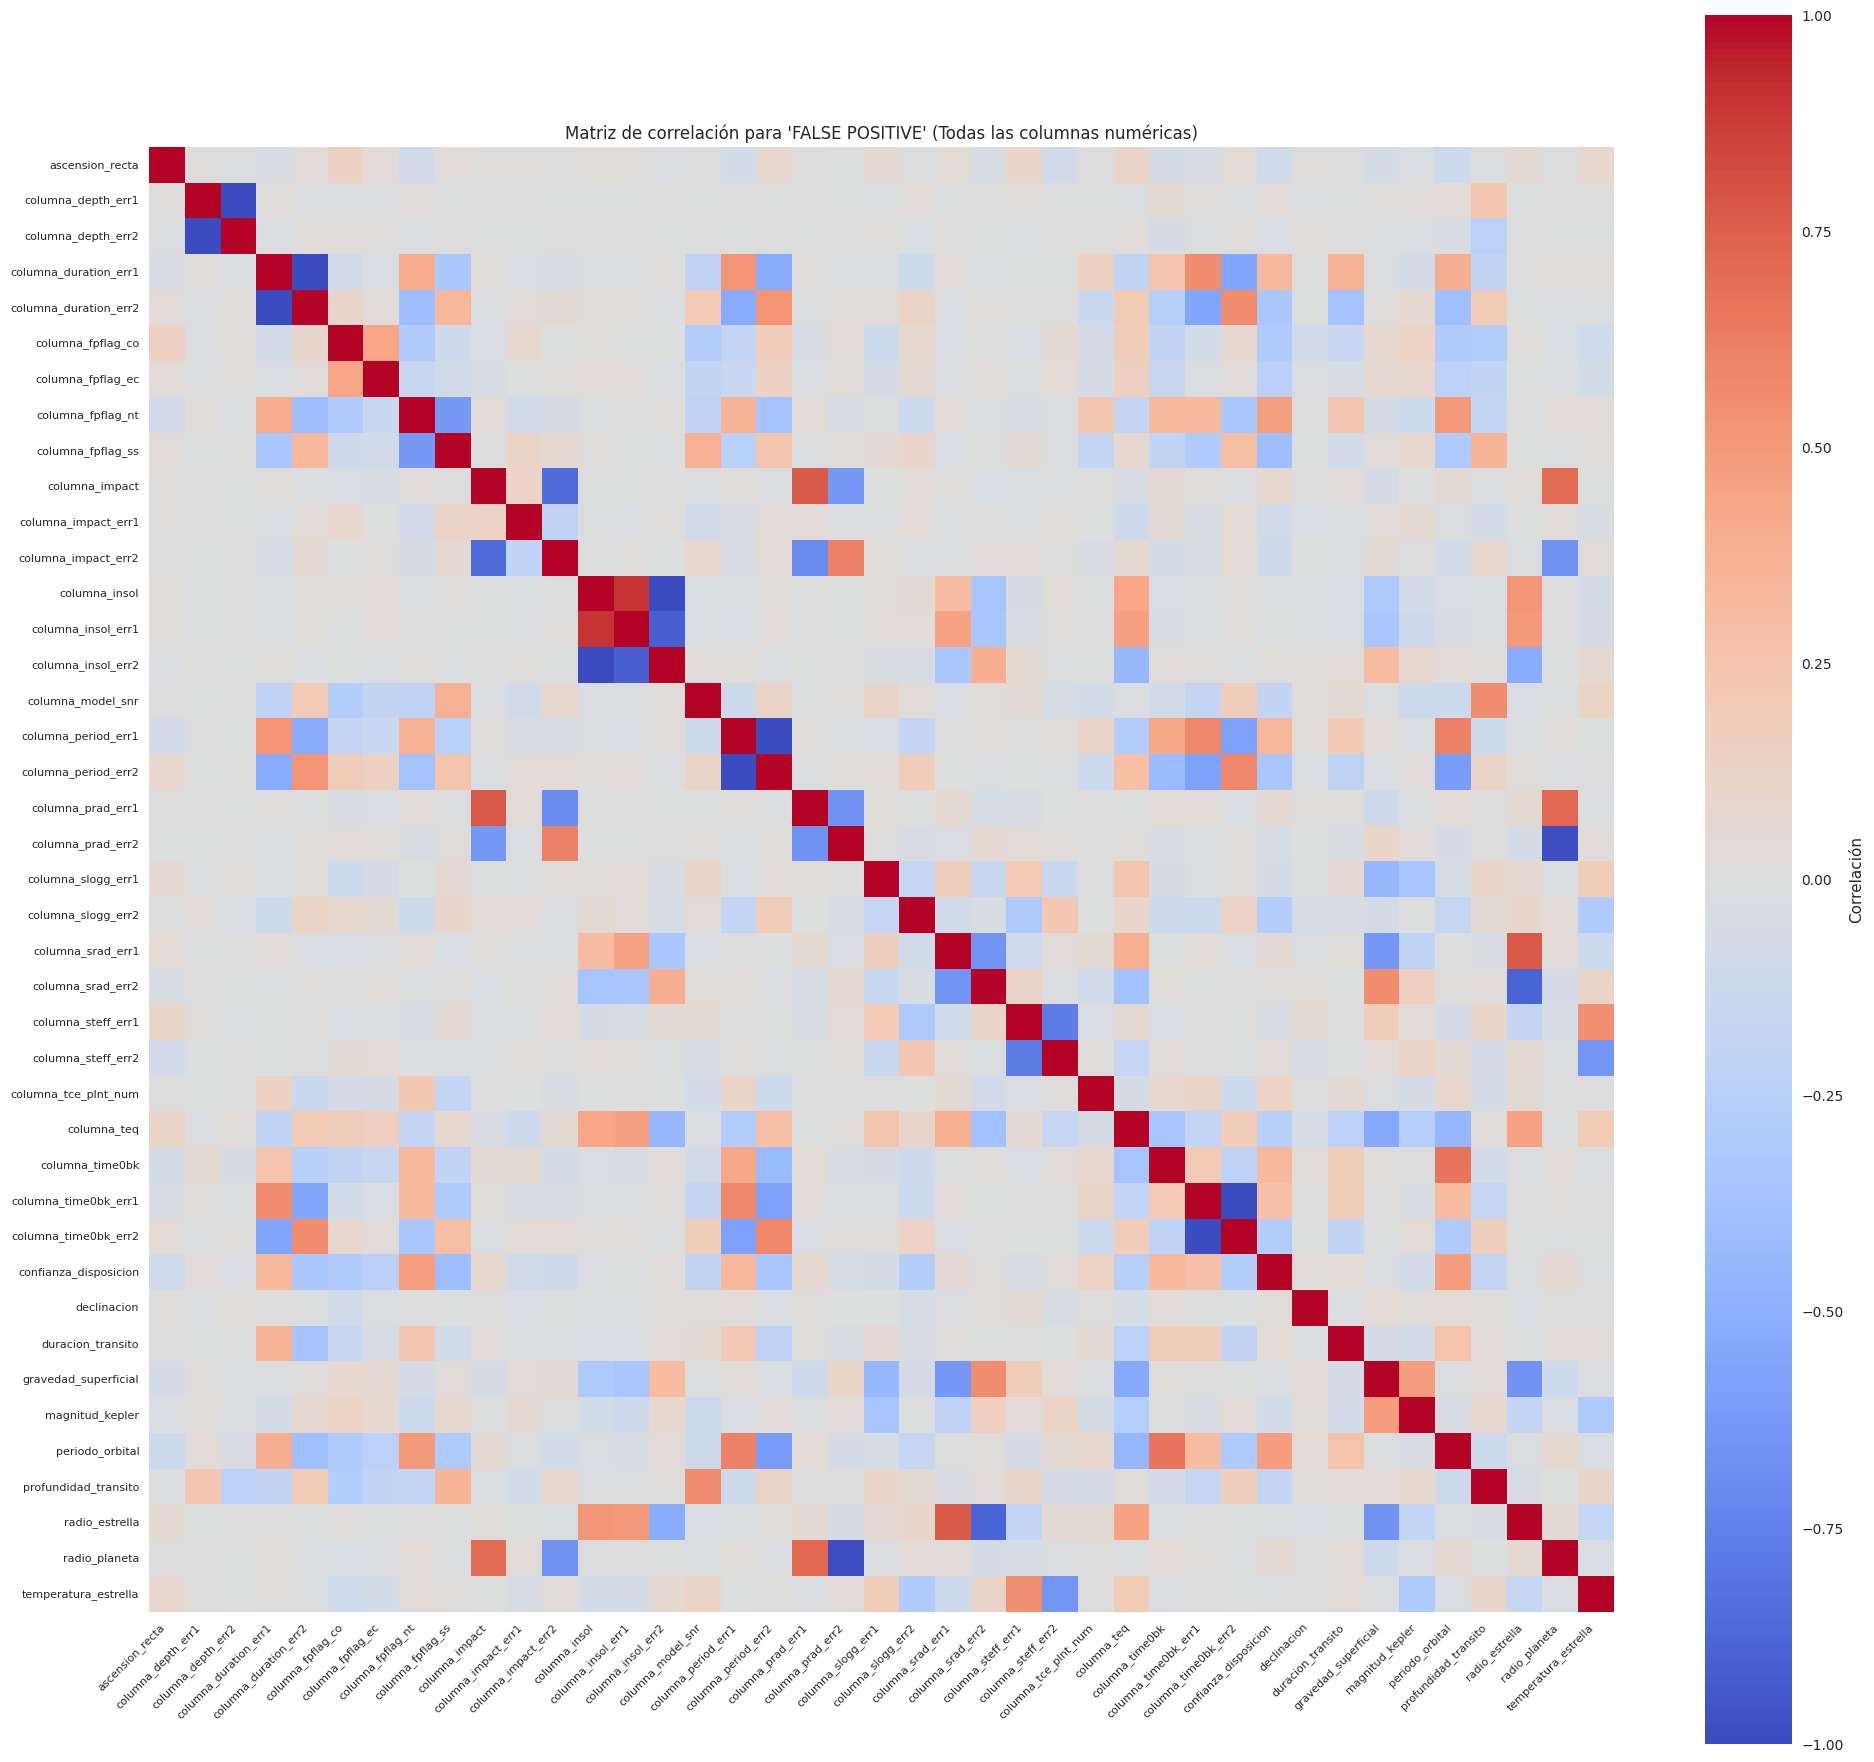

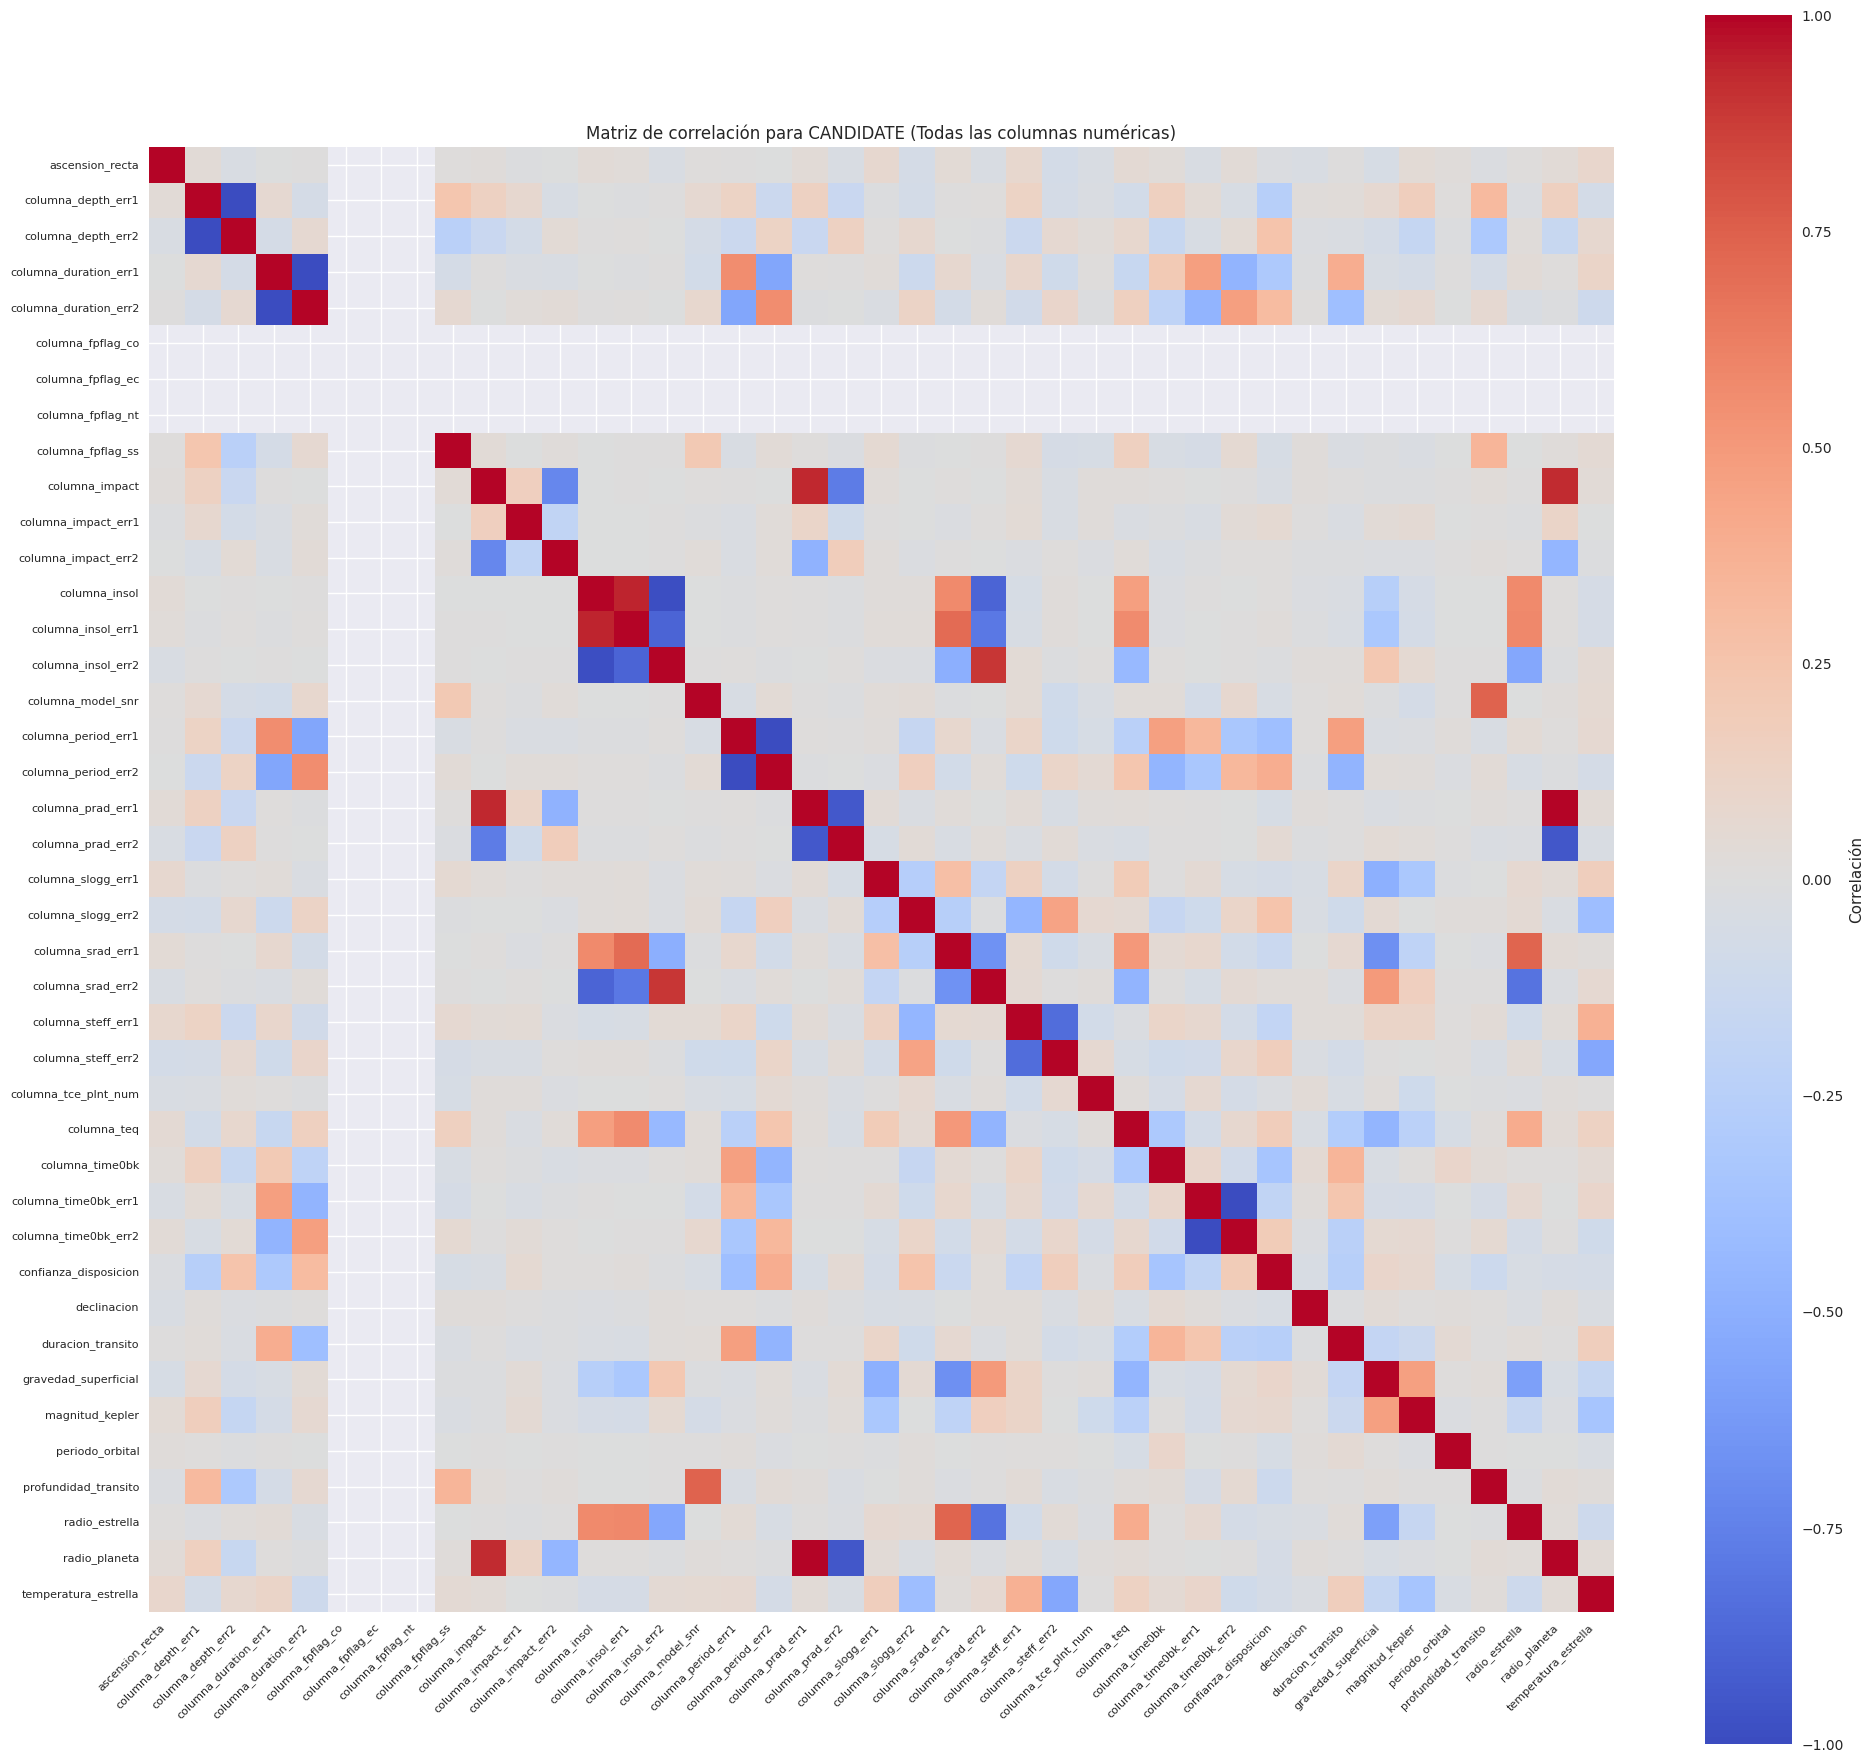

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
dt = pd.read_csv('cumulative_preprocesado.csv')

# Lista de todas las columnas numéricas
numeric_cols = [
    'ascension_recta', 'columna_depth_err1', 'columna_depth_err2', 'columna_duration_err1',
    'columna_duration_err2', 'columna_fpflag_co', 'columna_fpflag_ec', 'columna_fpflag_nt',
    'columna_fpflag_ss', 'columna_impact', 'columna_impact_err1', 'columna_impact_err2',
    'columna_insol', 'columna_insol_err1', 'columna_insol_err2', 'columna_model_snr',
    'columna_period_err1', 'columna_period_err2', 'columna_prad_err1', 'columna_prad_err2',
    'columna_slogg_err1', 'columna_slogg_err2', 'columna_srad_err1', 'columna_srad_err2',
    'columna_steff_err1', 'columna_steff_err2', 'columna_tce_plnt_num', 'columna_teq',
    'columna_time0bk', 'columna_time0bk_err1', 'columna_time0bk_err2', 'confianza_disposicion',
    'declinacion', 'duracion_transito', 'gravedad_superficial', 'magnitud_kepler',
    'periodo_orbital', 'profundidad_transito', 'radio_estrella', 'radio_planeta',
    'temperatura_estrella'
]

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Generar una matriz de correlación por cada clase
for category in dt['disposicion_literatura'].unique():
    # Filtrar datos por clase
    df_category = dt[dt['disposicion_literatura'] == category][numeric_cols]

    # Calcular la matriz de correlación
    corr_matrix = df_category.corr()

    # Crear el gráfico
    plt.figure(figsize=(20, 18))  # Tamaño grande para tantas columnas
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
                square=True, cbar_kws={'label': 'Correlación'},
                xticklabels=numeric_cols, yticklabels=numeric_cols)

    # Ajustar etiquetas para mejor legibilidad
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.title(f'Matriz de correlación para {category} (Todas las columnas numéricas)', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'correlation_matrix_{category}.png')
    plt.show()

## Entrenamiento de la red neuronal


In [11]:
# verificamos la dimensiones
print(X_train_final.shape, y_train.shape)
print(X_test_final.shape, y_test.shape)


(7651, 4) (7651,)
(1913, 4) (1913,)


/home/reed/entorno-global/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


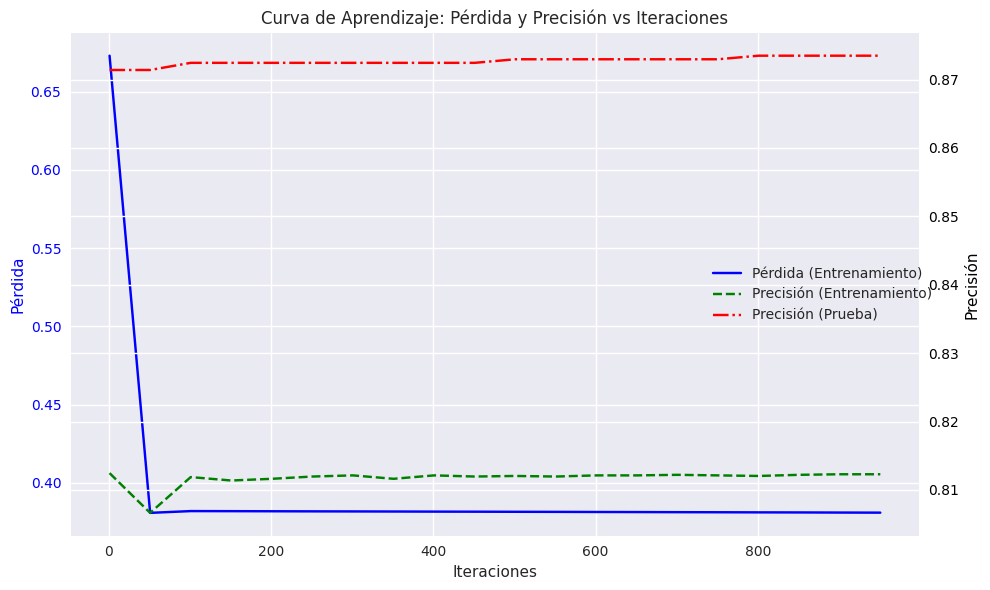

Precisión final en entrenamiento: 0.8122872561228726
Precisión final en prueba: 0.8734971249346576


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Asume que X_train_final, X_test_final, y_train, y_test están definidos
# Aplica SMOTE para desbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

# Entrena la red neuronal
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
                      solver='adam', random_state=42, max_iter=1000,
                      warm_start=True, verbose=False)

# Registra pérdida y precisión por iteración
train_loss = []
train_accuracy = []
test_accuracy = []
iterations = list(range(1, 1001, 50))  # Evalúa cada 50 iteraciones

for i in iterations:
    model.max_iter = i
    model.fit(X_train_balanced, y_train_balanced)
    train_loss.append(model.loss_)  # Pérdida en la última iteración
    train_accuracy.append(accuracy_score(y_train_balanced, model.predict(X_train_balanced)))
    test_accuracy.append(accuracy_score(y_test, model.predict(X_test_final)))

# Grafica
fig, ax1 = plt.subplots(figsize=(10, 6))

# Curva de pérdida
ax1.plot(iterations, train_loss, label='Pérdida (Entrenamiento)', color='blue')
ax1.set_xlabel('Iteraciones')
ax1.set_ylabel('Pérdida', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Curva de Aprendizaje: Pérdida y Precisión vs Iteraciones')

# Curva de precisión
ax2 = ax1.twinx()
ax2.plot(iterations, train_accuracy, label='Precisión (Entrenamiento)', color='green', linestyle='--')
ax2.plot(iterations, test_accuracy, label='Precisión (Prueba)', color='red', linestyle='-.')
ax2.set_ylabel('Precisión', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Leyendas
fig.legend(loc='center right', bbox_to_anchor=(0.95, 0.5))
plt.tight_layout()
plt.savefig('training_curve_exoplanets.png')
plt.show()

# Imprime métricas finales
print("Precisión final en entrenamiento:", train_accuracy[-1])
print("Precisión final en prueba:", test_accuracy[-1])